In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv("/content/Medicine_Details.csv")


In [3]:
print("Basic Information about the Dataset:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB
None

Summary Statistics:
       Excellent Review %  Average Review %  Poor Review %
count        11825.000000      11825.000000   11825.000000
mean            38.516025         35.756364      25.727611
std             25.225343         18.268134      23.991985
min          

In [4]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64


In [5]:
print("\nTop 5 Most Common Manufacturers:")
print(data['Manufacturer'].value_counts().head(5))


Top 5 Most Common Manufacturers:
Manufacturer
Sun Pharmaceutical Industries Ltd    820
Intas Pharmaceuticals Ltd            654
Cipla Ltd                            574
Torrent Pharmaceuticals Ltd          445
Lupin Ltd                            435
Name: count, dtype: int64


In [6]:
print("\nStatistics for Review Percentages:")
print(data[['Excellent Review %', 'Average Review %', 'Poor Review %']].describe())


Statistics for Review Percentages:
       Excellent Review %  Average Review %  Poor Review %
count        11825.000000      11825.000000   11825.000000
mean            38.516025         35.756364      25.727611
std             25.225343         18.268134      23.991985
min              0.000000          0.000000       0.000000
25%             22.000000         27.000000       0.000000
50%             34.000000         35.000000      22.000000
75%             51.000000         47.000000      35.000000
max            100.000000         88.000000     100.000000


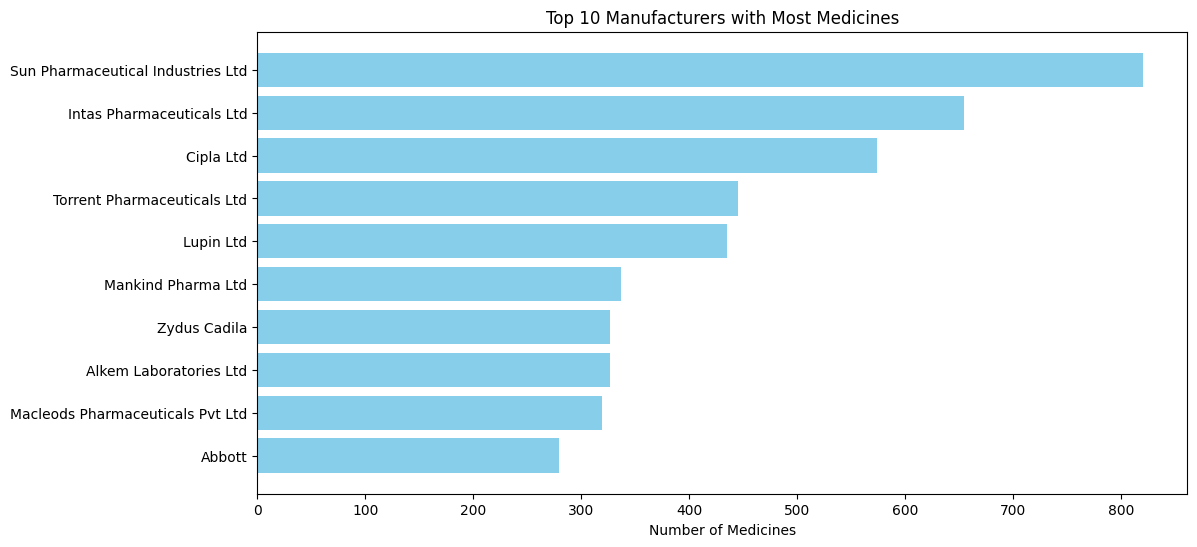

In [7]:
top_manufacturers = data['Manufacturer'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_manufacturers.index, top_manufacturers.values, color='skyblue')
plt.xlabel("Number of Medicines")
plt.title("Top 10 Manufacturers with Most Medicines")
plt.gca().invert_yaxis()
plt.show()


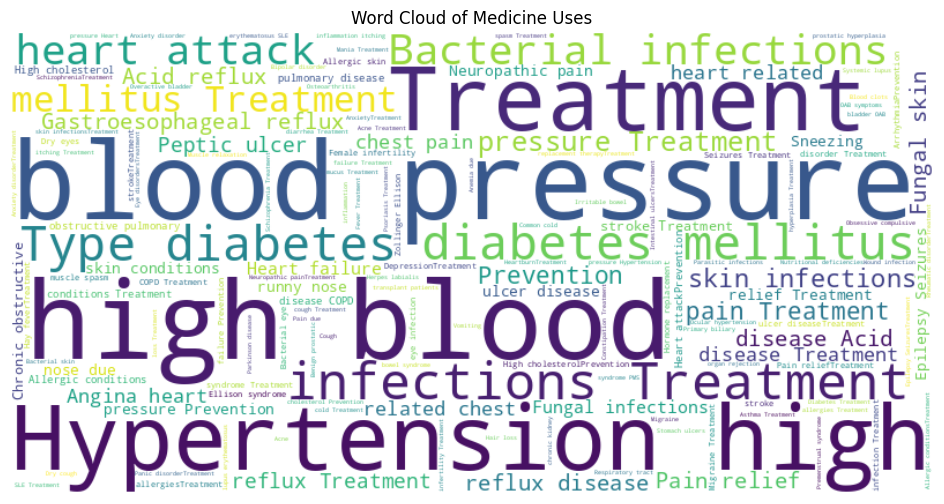

In [8]:
uses_text = " ".join(data['Uses'].dropna())
plt.figure(figsize=(12, 6))
wordcloud_uses = WordCloud(width=800, height=400, background_color='white').generate(uses_text)
plt.imshow(wordcloud_uses, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Medicine Uses")
plt.show()

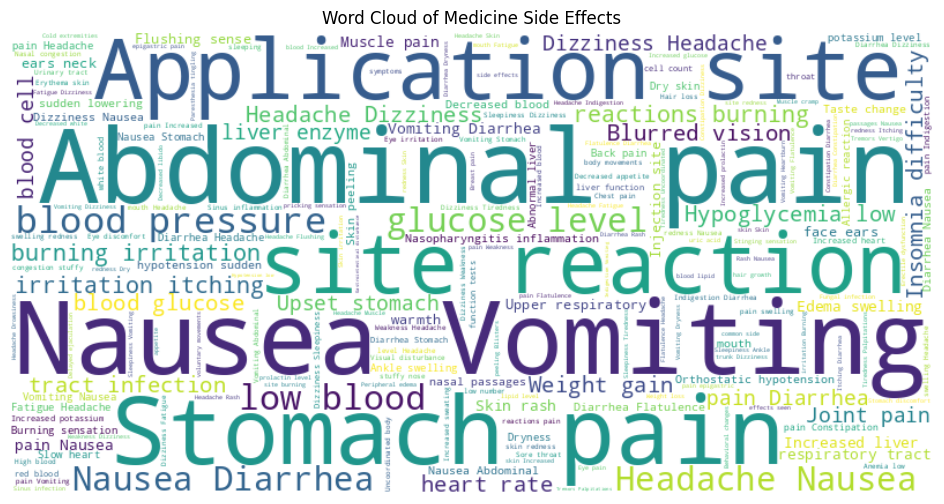

In [9]:
side_effects_text = " ".join(data['Side_effects'].dropna())
plt.figure(figsize=(12, 6))
wordcloud_side_effects = WordCloud(width=800, height=400, background_color='white').generate(side_effects_text)
plt.imshow(wordcloud_side_effects, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Medicine Side Effects")
plt.show()

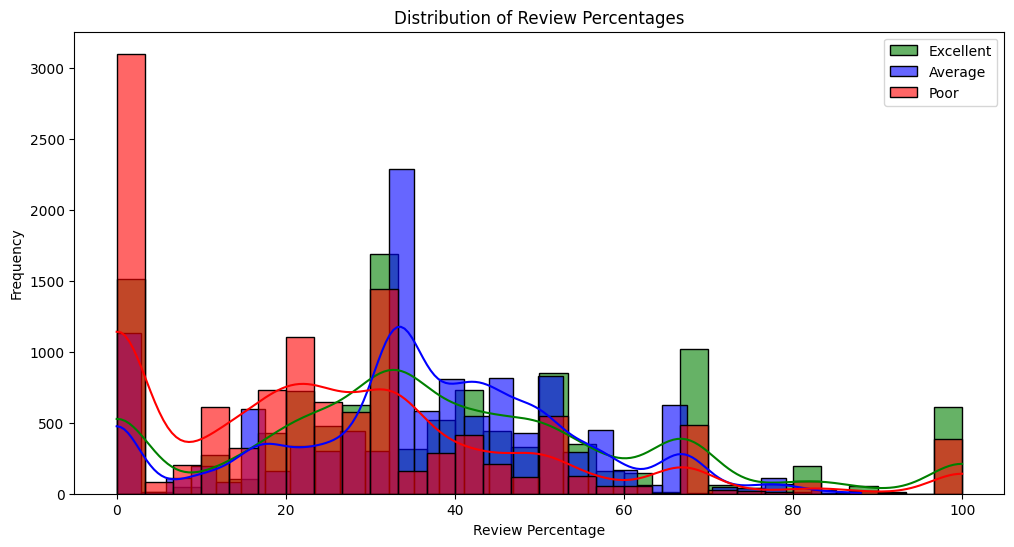

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Excellent Review %'], kde=True, color='green', label='Excellent', bins=30, alpha=0.6)
sns.histplot(data['Average Review %'], kde=True, color='blue', label='Average', bins=30, alpha=0.6)
sns.histplot(data['Poor Review %'], kde=True, color='red', label='Poor', bins=30, alpha=0.6)
plt.xlabel("Review Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Review Percentages")
plt.legend()
plt.show()

In [11]:
top_rated_medicines = data[data['Excellent Review %'] > 50].sort_values(by='Excellent Review %', ascending=False)
print("\nTop 5 Medicines with Excellent Reviews:")
print(top_rated_medicines[['Medicine Name', 'Uses', 'Side_effects', 'Excellent Review %']].head(5))


Top 5 Medicines with Excellent Reviews:
                 Medicine Name  \
6086     Myotec S 360mg Tablet   
3240     Gabacnx NT 100 Tablet   
3206  Germero 1000mg Injection   
3209            GM -SR1 Tablet   
9147       Symhylo 1% Eye Drop   

                                                   Uses  \
6086   Prevention of organ rejection in transplant p...   
3240                      Treatment of Neuropathic pain   
3206                        Severe bacterial infections   
3209              Treatment of Type 2 diabetes mellitus   
9147                              Treatment of Dry eyes   

                                           Side_effects  Excellent Review %  
6086  Nausea Vomiting Diarrhea Abdominal pain Headac...                 100  
3240  Constipation Difficulty in urination Weight ga...                 100  
3206  Rash Headache Vomiting Nausea Itching Diarrhea...                 100  
3209  Hypoglycemia low blood glucose level Headache ...                 100  
9147     

In [12]:
top_rated_medicines.to_csv("Top_Rated_Medicines.csv", index=False)
print("\nTop-rated medicines saved to 'Top_Rated_Medicines.csv'")


Top-rated medicines saved to 'Top_Rated_Medicines.csv'


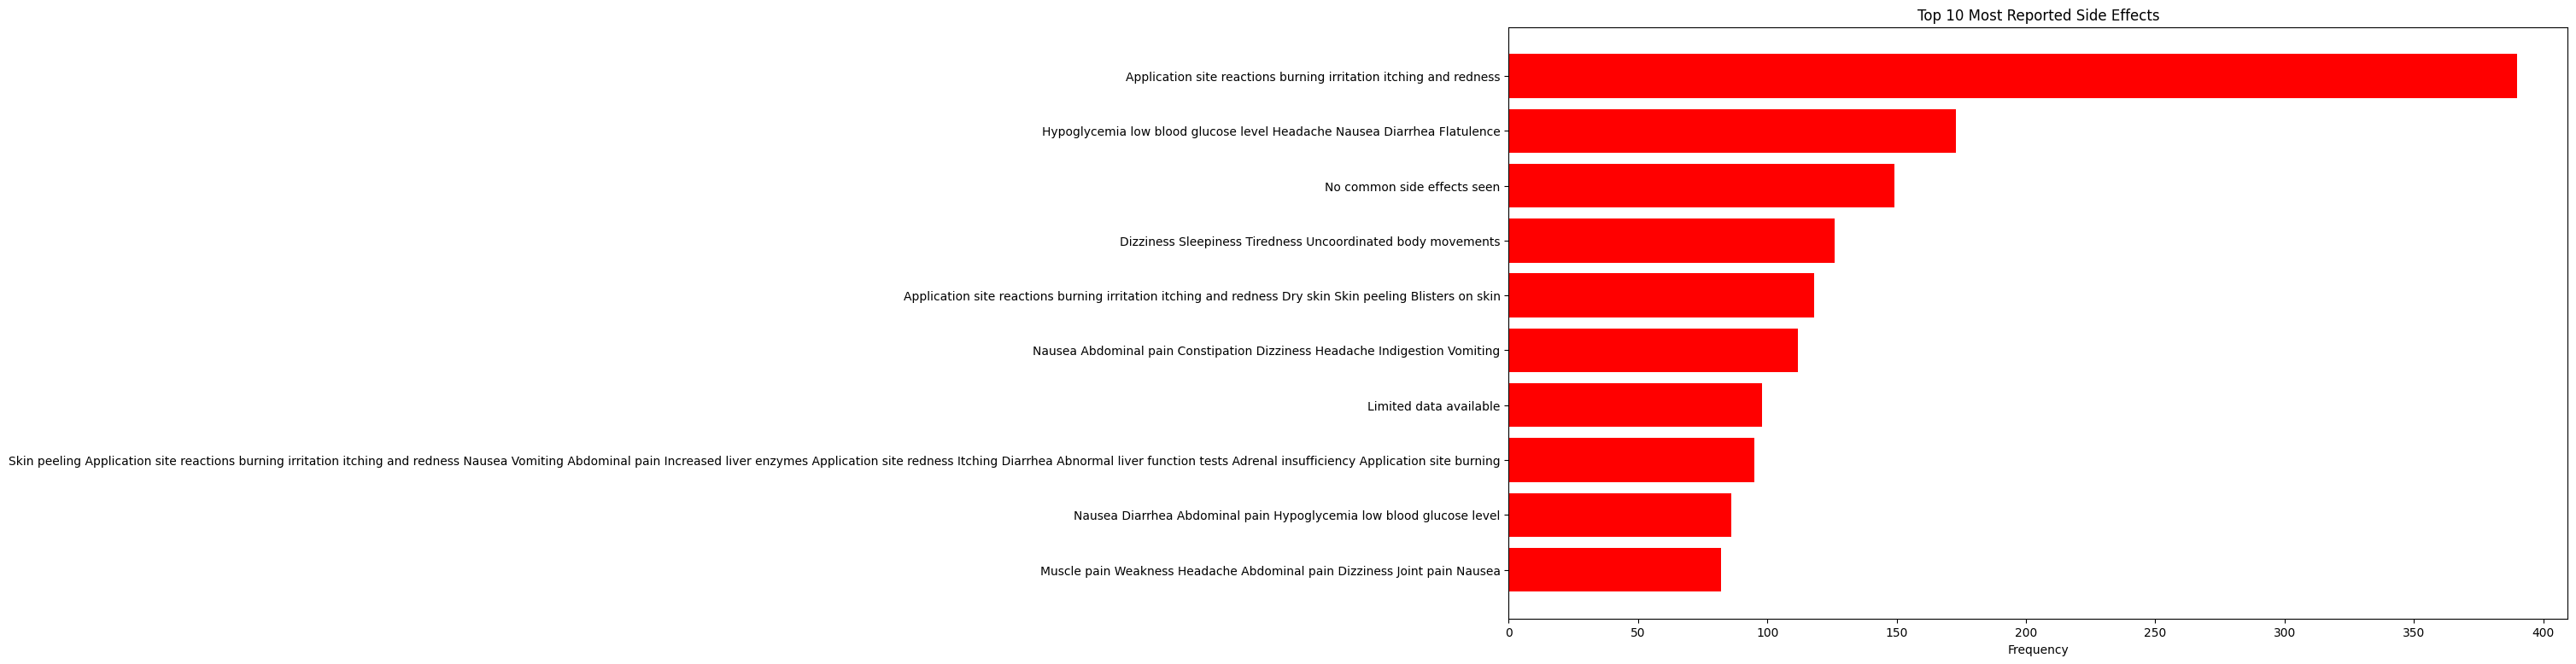

In [19]:
import matplotlib.pyplot as plt
from collections import Counter


all_side_effects = data['Side_effects'].str.split(', ').explode().dropna()
side_effect_counts = Counter(all_side_effects)
top_side_effects = side_effect_counts.most_common(10)


effects, counts = zip(*top_side_effects)
plt.figure(figsize=(16, 9))
plt.barh(effects, counts, color='red')
plt.xlabel("Frequency")
plt.title("Top 10 Most Reported Side Effects")
plt.gca().invert_yaxis()
plt.show()

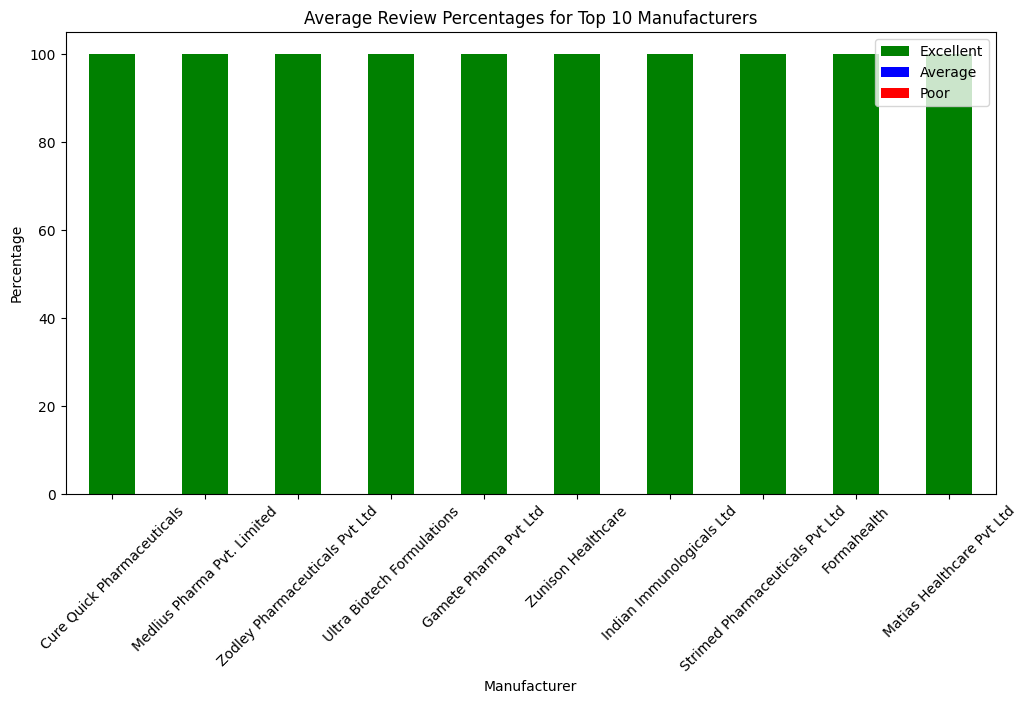

In [20]:

manufacturer_reviews = data.groupby('Manufacturer')[['Excellent Review %', 'Average Review %', 'Poor Review %']].mean().sort_values(by='Excellent Review %', ascending=False).head(10)

manufacturer_reviews.plot(kind='bar', figsize=(12, 6), stacked=True, color=['green', 'blue', 'red'])
plt.title("Average Review Percentages for Top 10 Manufacturers")
plt.ylabel("Percentage")
plt.xlabel("Manufacturer")
plt.legend(["Excellent", "Average", "Poor"])
plt.xticks(rotation=45)
plt.show()

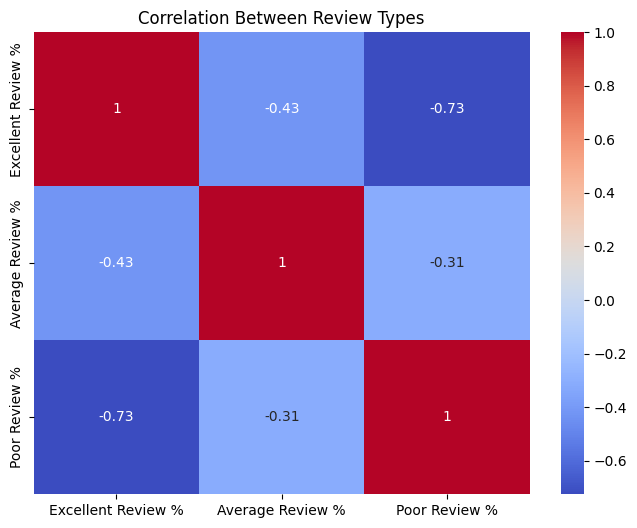

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Review Types")
plt.show()